# Réduction de dataset
Réduction de la base de données `20newsgroups` en sélectionnant 10% de dataset et préservant la distribution des `targets`

In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sys import path
path.append("..")

from iads.preprocessing import add_real_labels

sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'Proxima Nova'

## Chargement de dataset

Text(0.5, 1.0, 'Distribution de target (dataset complet)')

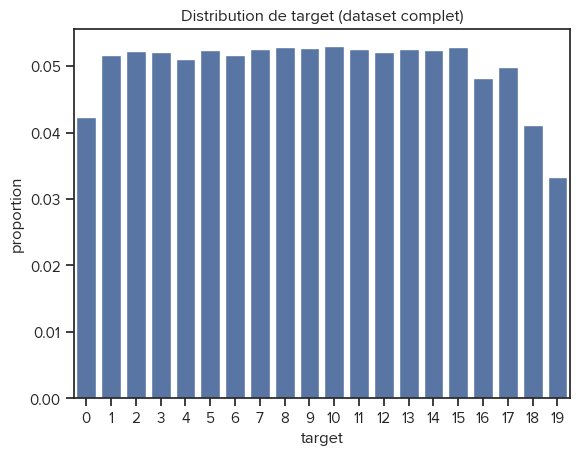

In [9]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")

ax = sns.barplot(data=newsgroups_df["target"].value_counts(normalize=True))
ax.set_title("Distribution de target (dataset complet)")

## Prendre 10% de dataset en préservant la distribution

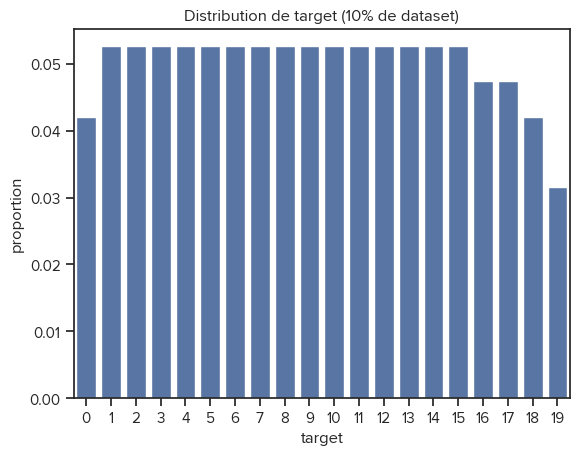

In [ ]:
np.random.seed(1)
newsgroups_df = newsgroups_df.groupby("target").sample(frac=0.1)
newsgroups_df = add_real_labels(newsgroups_df)

ax = sns.barplot(data=newsgroups_df["target"].value_counts(normalize=True))
ax.set_title(f"Distribution de target (10% de dataset)")

newsgroups_df.to_csv("data/sample.csv", index=False)